# Explore here

In [2]:
# Your code here
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
import os

# Define the path to store the dataset
output_dir = 'data/raw'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
df.to_csv(f'{output_dir}/insurance_raw.csv', index=False)

print(f'Dataset stored as {output_dir}/insurance_raw.csv')

Dataset stored as data/raw/insurance_raw.csv


In [5]:
pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sqlalchemy import create_engine

# Create an SQLite database (this will create a file called titanic.db)
engine = create_engine('sqlite:///data/insurance.db')

# Store the dataset in a table called 'titanic_data'
df.to_sql('insurance_Data', con=engine, if_exists='replace', index=False)

print("Dataset stored in SQLite database as 'insurance_Data' table.")

Dataset stored in SQLite database as 'insurance_Data' table.


In [7]:
# Query the data from the SQLite database
df_from_db = pd.read_sql('SELECT * FROM insurance_Data', con=engine)

# Display the first few rows to confirm the data is loaded correctly
df_from_db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Check the unique values in categorical columns
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [10]:
# Check the unique values in categorical columns
df['age'].value_counts()

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64

In [11]:
# Check the unique values in categorical columns
df['charges'].value_counts()

charges
1639.56310     2
2221.56445     1
19798.05455    1
13063.88300    1
13555.00490    1
              ..
1149.39590     1
37079.37200    1
4738.26820     1
2897.32350     1
4762.32900     1
Name: count, Length: 1337, dtype: int64

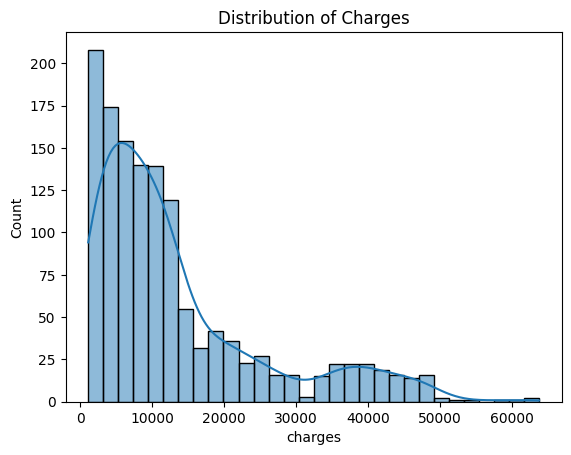

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'charges' column
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.show()

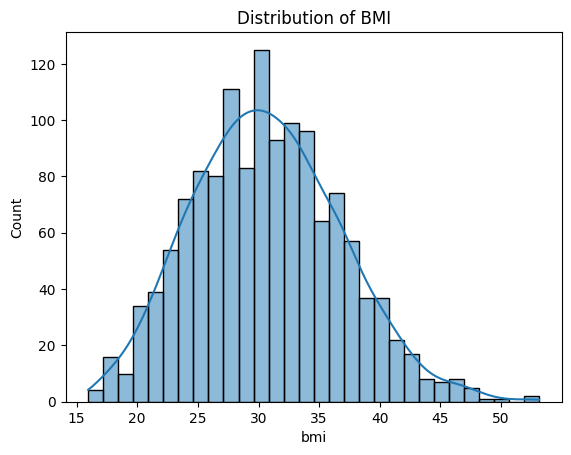

In [13]:
# Plot a histogram for the 'bmi' column
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()

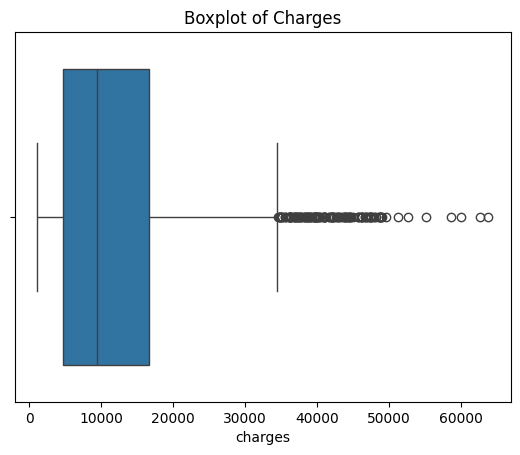

In [14]:
# Boxplot for Charges
sns.boxplot(x=df['charges'])
plt.title('Boxplot of Charges')
plt.show()

In [15]:
# Check the charges (class balance)
df['charges'].value_counts(normalize=True)

charges
1639.56310     0.001495
2221.56445     0.000747
19798.05455    0.000747
13063.88300    0.000747
13555.00490    0.000747
                 ...   
1149.39590     0.000747
37079.37200    0.000747
4738.26820     0.000747
2897.32350     0.000747
4762.32900     0.000747
Name: proportion, Length: 1337, dtype: float64

In [16]:
# Obtain dimensions of dataframe
# (# rows, # columns)
df.shape

(1338, 7)

In [17]:
df.columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df.duplicated().sum()

np.int64(0)

In [19]:
#1 duplicate existed before running this code
df = df.drop_duplicates()

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the proportion of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [23]:
# Define the threshold (e.g., 30%)
threshold = 30

# Drop columns where the percentage of missing values exceeds the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop those columns from the dataframe
df = df.drop(columns=columns_to_drop)

print(f"Following columns were dropped: {list(columns_to_drop)}")

Following columns were dropped: []


In [24]:
# Check the remaining columns after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


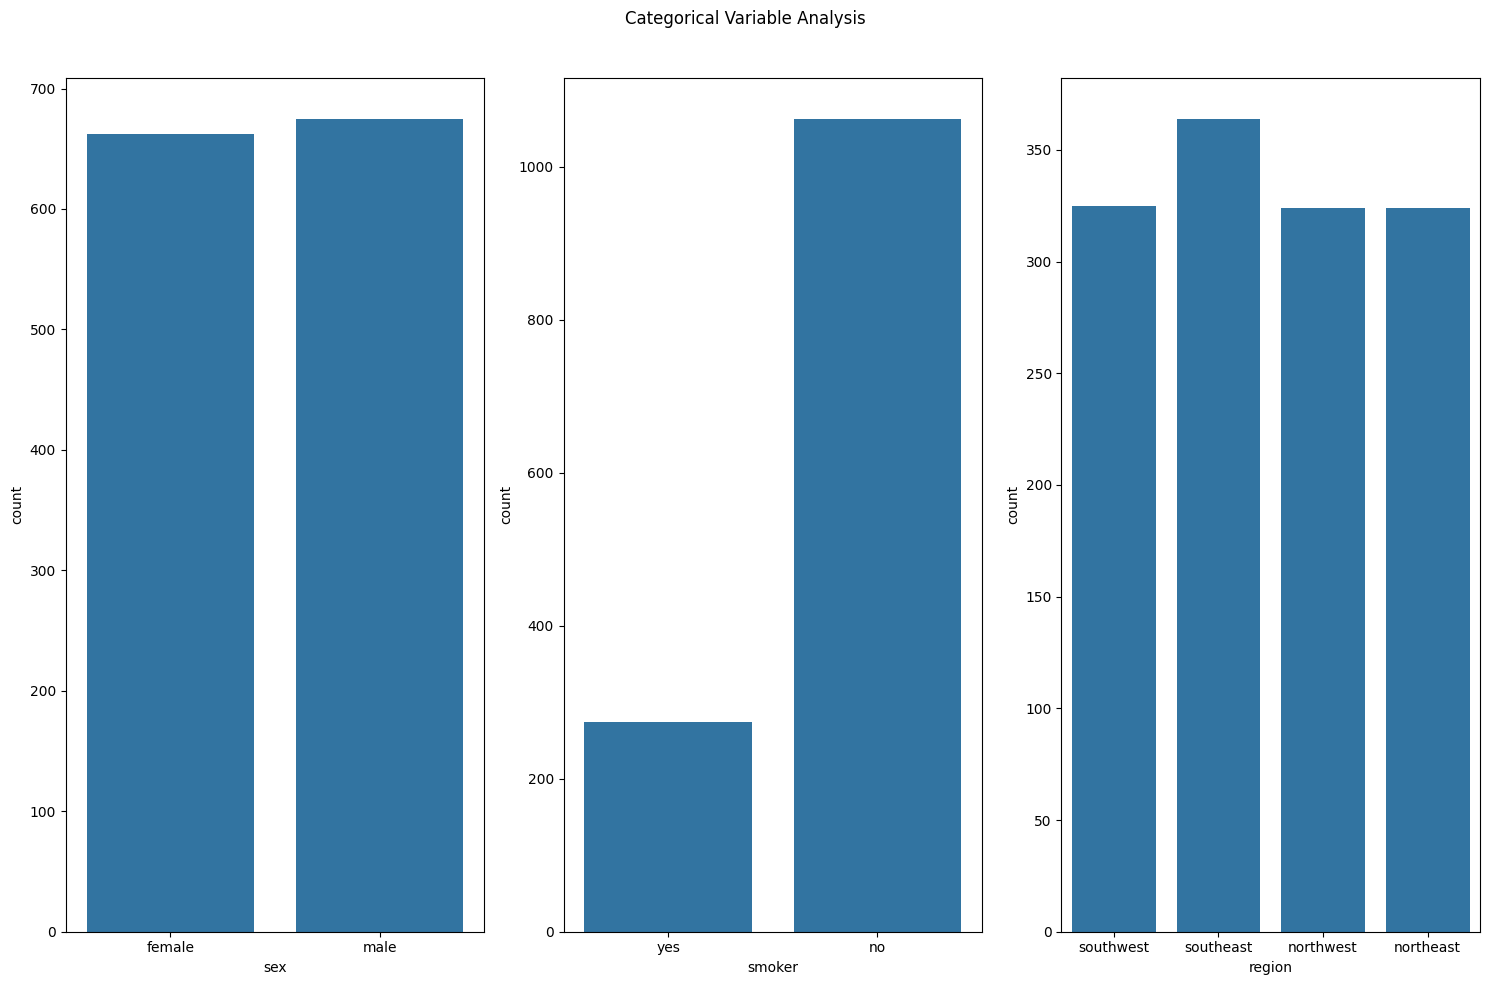

In [25]:
categorical_features = ['sex', 'smoker', 'region']

fig, axis = plt.subplots(1, 3, figsize=(15, 10))  

sns.countplot(ax=axis[0], data=df, x="sex")
sns.countplot(ax=axis[1], data=df, x="smoker")
sns.countplot(ax=axis[2], data=df, x="region")


plt.suptitle("Categorical Variable Analysis")
plt.tight_layout(rect=[0, 0, 1, 0.96])  


plt.show()

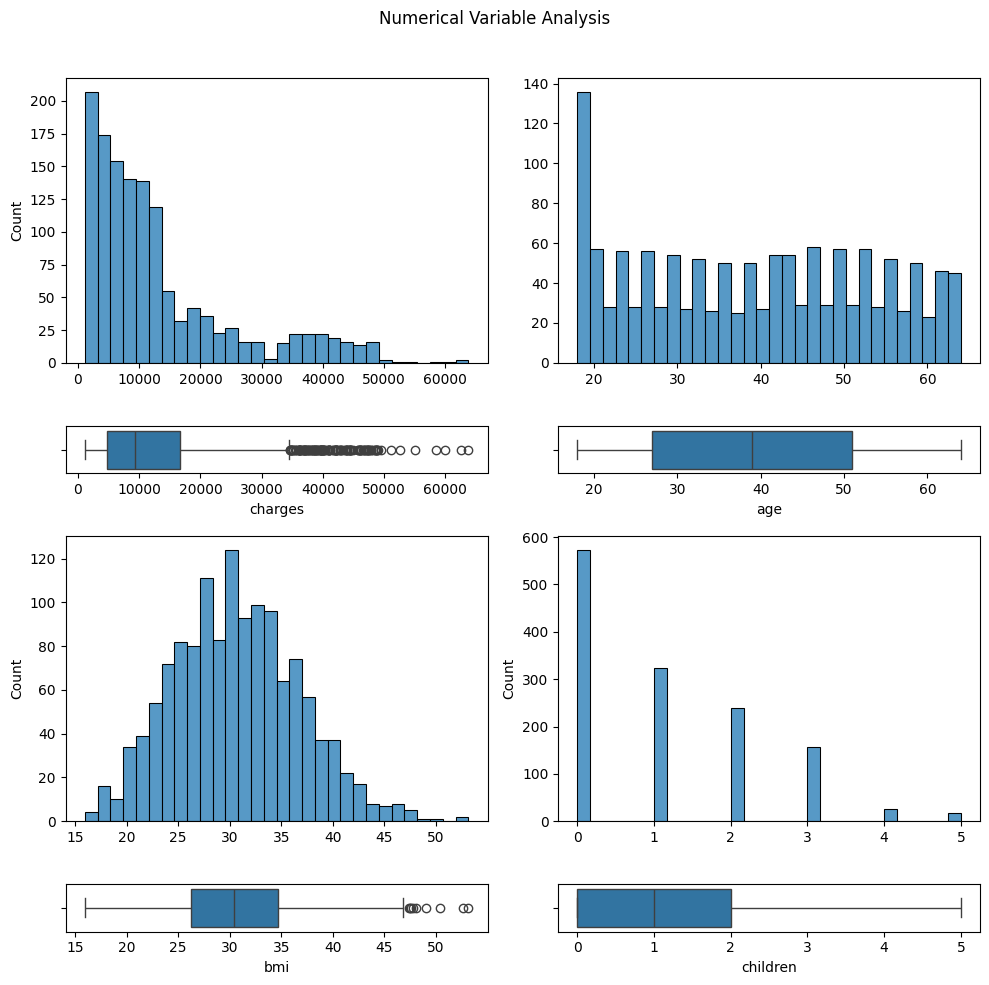

In [30]:
numerical_features = ['age', 'bmi', 'children', 'charges']

fig, axis = plt.subplots(4, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax=axis[0, 0], data=df, x="charges", bins=30).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="charges") 

sns.histplot(ax=axis[0, 1], data=df, x="age", bins=30).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="age")

sns.histplot(ax=axis[2, 0], data=df, x="bmi", bins=30).set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="bmi")


sns.histplot(ax=axis[2, 1], data=df, x="children", bins=30).set(xlabel=None)  
sns.boxplot(ax=axis[3, 1], data=df, x="children")  

plt.suptitle("Numerical Variable Analysis")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title


plt.show()

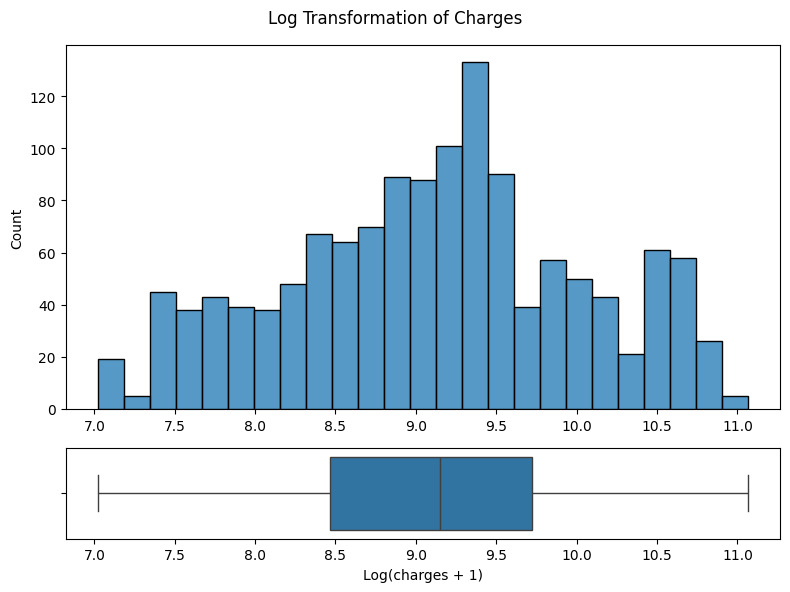

In [31]:
import numpy as np

# Create a figure with 2 subplots: one for the histogram and one for the boxplot
fig, axis = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [4, 1]})

# Apply log transformation to 'Price' using log1p (log(x + 1)) to avoid log(0)
# Plot the log-transformed 'Price' histogram and boxplot
sns.histplot(np.log1p(df['charges']), bins=25, ax=axis[0]).set(xlabel = None)
sns.boxplot(x=np.log1p(df['charges']), ax=axis[1])
axis[1].set_xlabel('Log(charges + 1)')

# Adjust layout and show the plot
plt.suptitle("Log Transformation of Charges")
plt.tight_layout()
plt.show()

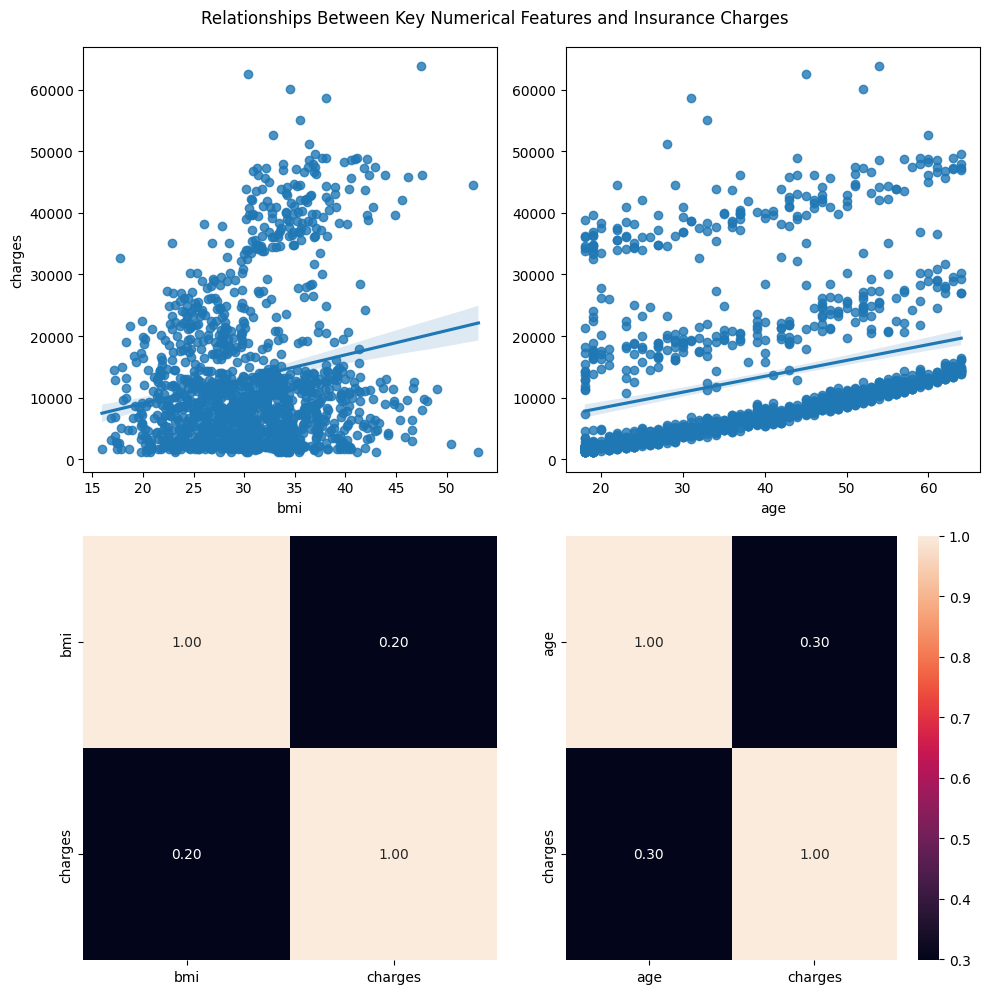

In [32]:
# Our numerical features
numerical_features

fig, axis = plt.subplots(2, 2, figsize = (10, 10))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


plt.suptitle("Relationships Between Key Numerical Features and Insurance Charges", y=0.99)
plt.tight_layout()

# Show the plot
plt.show()